In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 統計モデル

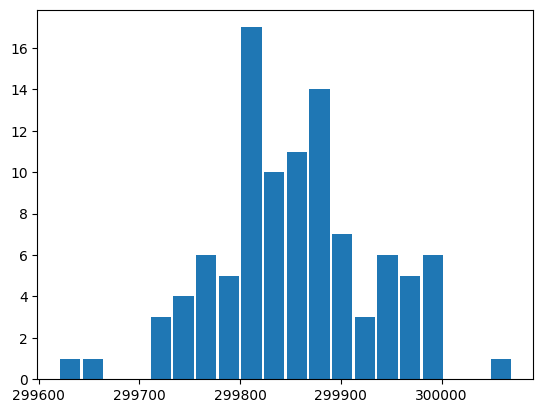

In [2]:
dat = pd.read_csv('data/morley.csv')
plt.hist(dat, bins=20, rwidth=0.9)
plt.show()

## 最尤推定量の計算法

In [3]:
x = np.random.uniform(size=10)
np.max(x)

0.8477082941827901

In [4]:
x = np.random.uniform(size=100)
np.max(x)

0.9992435396630812

In [5]:
# データ数
n = 10
# データ生成
x = np.random.uniform(size=n)
# 不偏推定量
((n+1) / n) * np.max(x)

0.9513607223342467

In [6]:
X = np.random.rand(100, n)
X.shape

(100, 10)

In [7]:
# 最尤推定の平均値
# np.maxで行列Xの各行(axis=1)にmaxを適用
# それらの平均値を求める
np.mean(np.max(X, axis=1))

0.9151482988378303

In [8]:
# 不偏推定量の平均値
np.mean((n+1)/n * np.max(X, axis=1))

1.0066631287216137

In [9]:
df = pd.DataFrame(X)

In [10]:
# 最尤推定の平均値
np.mean(df.apply(np.max, axis=1))

0.9151482988378303

In [11]:
# 不偏推定の平均値
np.mean(df.apply(lambda x:(n+1)/n*np.max(x), axis=1))

1.0066631287216137

In [12]:
from common import bloodtype as bt

In [13]:
n = np.array([40, 30, 10, 20])
bt.mle(n)

Optimization terminated successfully.
         Current function value: 144.056068
         Iterations: 28
         Function evaluations: 54


array([ 0.30046383,  0.25462732, -0.55509115])

## 混合モデルとEMアルゴリズム

In [14]:
from common.statmodelEMalg import EMmixBernoulli
a = pd.read_csv('data/optdigits_train.csv')
x = a.values[:, 0:64] > 8
x.shape

(3822, 64)

In [15]:
y = a.values[:, 64]
em = EMmixBernoulli(K=10)
em.fit(x)
ec = em.predict(x)

In [16]:
u, c = np.unique(y[ec==0], return_counts=True)
np.c_[u, c].T

array([[  0,   1,   2,   4,   5,   6,   8],
       [  1,   5,   1,   3,   2, 367,   4]])

In [17]:
u, c = np.unique(y[ec==2], return_counts=True)
np.c_[u, c].T

array([[  0,   1,   4,   5,   6],
       [  1,   1, 256,   1,   1]])

In [18]:
em.K = 5
ec = em.predict(x)
u, c = np.unique(y[ec==2], return_counts=True)
np.c_[u, c].T

array([[  0,   1,   4,   5,   6],
       [  1,   1, 256,   1,   1]])

In [19]:
em.BIC

75748.48965028372

In [20]:
eml = EMmixBernoulli()
Klist = np.arange(4, 51)
BIClist = np.array([])
for K in Klist:
    if K % 10 == 0:
        print('K=', K)
    eml.K = K
    eml.fit(x)
    BIClist = np.append(BIClist, eml.BIC)

K= 10
K= 20
K= 30
K= 40
K= 50


In [21]:
Klist[np.argmin(BIClist)]

23

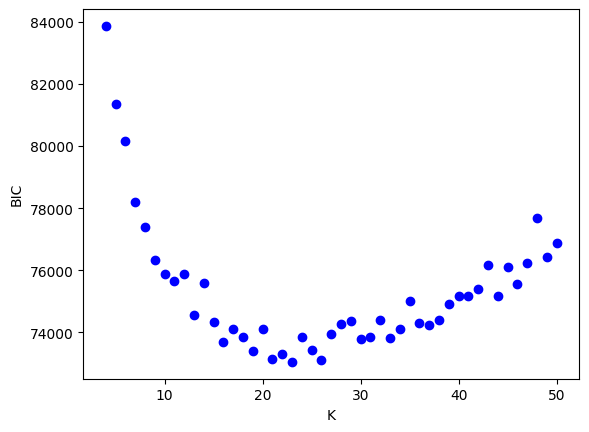

In [22]:
plt.xlabel("K")
plt.ylabel("BIC")
plt.plot(Klist, BIClist, 'o', c='b')
plt.show()